In [1]:
import pandas as pd
import numpy as np

import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

In [2]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
from google.colab.patches import cv2_imshow

In [5]:
X_train.shape

(60000, 28, 28)

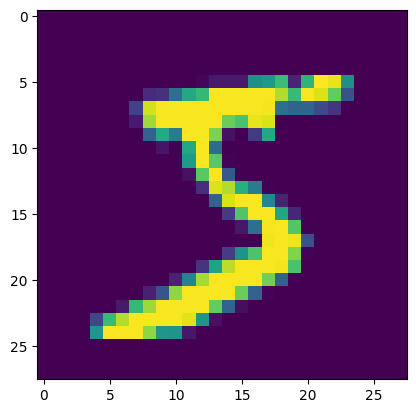

In [9]:
img = plt.imshow(X_train[0])

In [10]:
img

In [13]:
cv2_imshow(X_train[15])

In [15]:
X_train[15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 115, 121, 162, 253, 253, 213,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        107, 170, 251, 252, 252, 252, 252, 250, 214,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 192, 226, 226, 241,
        252, 253, 202, 252, 252, 252, 252, 252, 225,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  68, 223, 252, 252, 252, 252,
        252,  39,  19,  39,  65, 224, 252, 252, 183,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 186, 252, 252, 252, 245, 108,
         53,   0,   0,   0, 150, 252, 252, 220,  20,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  70, 242, 252, 252, 222,  59,   0,
          0,   0,   0,   0, 178, 252, 252, 141,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 185, 252, 252, 194,  67,   0,   0,
          0,   0,  17,  90, 240, 252, 194,  67,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  83, 205, 190,  24,   0,   0,   0,
          0,   0, 121, 252, 252, 209,  24,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  77, 247, 252, 248, 106,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252, 252, 102,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        134, 255, 253, 253,  39,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
        183, 253, 252, 107,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 102,
        252, 253, 163,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 168, 252,
        252, 110,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  41, 252, 252,
        217,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 155, 252, 214,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 252, 106,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [16]:
X_train = X_train/255

In [17]:
X_test = X_test/255

In [19]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation="relu"),
                          keras.layers.Dense(50, activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")])

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8298 - loss: 0.5706 - val_accuracy: 0.9403 - val_loss: 0.1926
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9513 - loss: 0.1641 - val_accuracy: 0.9522 - val_loss: 0.1571
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9640 - loss: 0.1184 - val_accuracy: 0.9563 - val_loss: 0.1404
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9720 - loss: 0.0923 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9785 - loss: 0.0740 - val_accuracy: 0.9630 - val_loss: 0.1221
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0604 - val_accuracy: 0.9649 - val_loss: 0.1178
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9680 - val_loss: 0.1126
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0410 -

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.2210


In [26]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
Y_pred

array([[1.0378982e-06, 6.8155071e-03, 2.9089156e-04, ..., 1.0000000e+00,
        1.1106943e-02, 1.4016563e-02],
       [7.3946938e-03, 9.9827093e-01, 1.0000000e+00, ..., 1.2767479e-15,
        2.7386709e-06, 3.4774406e-21],
       [9.1927679e-05, 9.9992639e-01, 8.0351753e-04, ..., 4.5873386e-01,
        4.4834528e-02, 8.4580574e-04],
       ...,
       [1.1380515e-07, 1.4074375e-05, 1.1376654e-16, ..., 3.1339966e-02,
        1.6612220e-04, 9.9997425e-01],
       [9.3213137e-04, 4.4659332e-06, 3.6377116e-16, ..., 5.6430264e-03,
        5.4138261e-01, 8.6408645e-06],
       [6.0714636e-02, 9.0987683e-08, 7.0420867e-01, ..., 3.4391229e-18,
        7.1868710e-02, 3.1716511e-06]], dtype=float32)

In [29]:
Y_pred_lables = [np.argmax(i) for i in Y_pred]

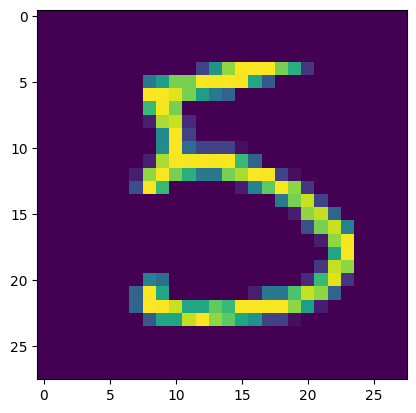

In [35]:
plt.imshow(X_test[15])

In [36]:
Y_test[15]

np.uint8(5)

In [37]:
Y_pred_lables[15]

np.int64(5)

# **Images**

In [77]:
input_image = "/content/img_27960.jpg"

In [78]:
img = cv2.imread(input_image)

In [79]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [80]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [81]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  16,   0,   0,   2,
          0,   6,   0,   0,   0,   0,   0,  11,   0,   0,   8,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   6,   2,
          0,   0,   3,   3,   3,  20,   7,   0,   2,  19,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14,   0,   8,   8,   0,
          7,   0,   1,   0,   0,   0,   7,  13,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         15,   5,   0,   0,  18,   2,   0,   1,   2,   0,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   6,   0,   2,
          0,   0,   0,   9,   0,   0,   5,   0,   1,  13,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 238,
        255, 255, 249, 129,  54,   0,   0,   5,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 106, 230, 255,
        247, 250, 249, 255, 245, 136,  18,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0, 141, 255, 255,
        246, 211, 160, 218, 255, 255, 165,  34,   0,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   6,   0,   1,   0,  32, 208, 209,
        191,  52,   0,  35, 209, 251, 255,  25,   0,   0,   4,   0,   0,
          0,   0],
       [  2,   1,   6,   7,   0,   0,   1,   0,   0,  25,   0,   7,   0,
          6,   0,  25,   1, 133, 254, 255,  13,   1,   6,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   4,   2,   0,   0,   2,   1,   0,   3,   1,   0,
          7,  19,   0,   0, 145, 255, 255,  13,   6,   7,   0,   0,   0,
          0,   0],
       [  1,   2,   0,   0,   0,   2,   0,   4,   0,   5,   6,   0,   7,
          0,   0,   9,  20, 234, 251, 190,  15,   4,   0,   6,   0,   0,
          0,   0],
       [  0,  10,   1,   0,   5,  10,   0,   0,   0,   2,   0,   0,   5,
          2,   0,   5,  80, 255, 251,  71,   5,   0,   0,   7,   0,   0,
          0,   0],
       [  0,   8,   2,   0,   8,   4,   0,   0,   0,  28,  79,  84,   2,
          0,   6,   0, 178, 245, 245,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   0,   0,   6,   0,   0,  35, 143, 221, 249, 255, 254,
        212, 124,  90, 247, 247, 163,   0,   0,   0,   4,   0,   0,   0,
          0,   0],
       [  7,   4,   0,   0,   7,   0,  12,  87, 255, 247, 249, 239, 232,
        246, 255, 254, 251, 255,  45,  10,   0,   0,   2,   3,   0,   0,
          0,   0],
       [  4,   2,   0,   1,   0,   1,   0, 189, 254, 215,   0,   0,   4,
         85, 242, 255, 246, 176,   9,   7,   0,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   4,   1,   7,   0,   5,  12, 182, 255, 121,  31,   5,   5,
         16, 255, 247, 255, 209,   0,   0,   0,   0,   7,   1,   0,   0,
          0,   0],
       [  0,   8,   0,   7,   0,   0,   8, 106, 255, 251, 122,   7,  12,
        183, 235, 255, 255, 231, 123,   1,  12,   9,   0,   0,   0,   0,
          0,   0],
       [  3,   8,   0,   5,   0,   0,   0,  11, 153, 255, 252, 217, 204,
        255, 255, 179, 207, 255, 250,  31,   2,   0,  10,  13,   0,   0,
          0,   0],
       [  0,   3,   0,   7,   2,   7,   4,   0,  12,  72, 230, 241, 255,
        254, 182,  32,  56, 255, 250, 203,  17,   0,   8,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   6,   0,   0,   9,   0,   0,  14,  15, 180, 236,
        143,  39,   0,   3, 169, 245, 255,  69,   0,   0,  14,   0,   0,
          0,   0],
       [  2,   0,   6,   2,   0,   0,   0,   7,   9,   0,   0,   0,   4,
          9,   0,   1,   0,  25, 229, 240, 233,  44,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   3,   3,   0,   5,   0,   0,  10,   0,   0,
          0,   0,   2,   3,   8,  47, 255, 255, 187,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [82]:
img = img/255

In [83]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0627451 ,
        0.        , 0.        , 0.00784314, 0.        , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313725, 0.        , 0.        , 0.03137255, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568627, 0.        ,
        0.        , 0.02352941, 0.00784314, 0.        , 0.        ,
        0.01176471, 0.01176471, 0.01176471, 0.07843137, 0.02745098,
        0.        , 0.00784314, 0.0745098 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05490196, 0.        ,
        0.03137255, 0.03137255, 0.        , 0.02745098, 0.        ,
        0.00392157, 0.    

In [84]:
img_reshape = np.reshape(img, (1,28,28))

In [85]:
prediction = model.predict(img_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [86]:
print(prediction)

[[9.30256988e-07 9.54223225e-08 1.00000000e+00 3.13252896e-01
  7.08037291e-08 1.23895245e-06 1.09491168e-07 6.71410419e-07
  1.74402760e-03 1.15637055e-08]]


In [87]:
pred_labels = np.argmax(prediction)

In [88]:
print(pred_labels)

2


In [89]:
import joblib
joblib.dump(model, "mnist_model.pkl")

['mnist_model.pkl']

In [90]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [91]:
import gradio as gr
import numpy as np
from PIL import Image
import joblib

# Load model
model = joblib.load("mnist_model.pkl")

# Prediction function
def predict_digit(image):
    # Convert to grayscale if needed
    image = image.convert("L")

    # Resize to 28x28
    image = image.resize((28, 28))

    # Convert to numpy array and normalize
    image_array = np.array(image) / 255.0

    # Reshape to match model input
    image_reshaped = image_array.reshape(1, 28, 28)

    # Make prediction
    prediction = model.predict(image_reshaped)

    # Get predicted class
    predicted_digit = np.argmax(prediction)

    return f"Predicted Digit: {predicted_digit}"

# Gradio interface
gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="pil", label="Upload a handwritten digit"),
    outputs=gr.Textbox(label="Prediction"),
    title="MNIST Handwritten Digit Classifier",
    description="Upload an image of a digit (0–9) to see what the model predicts."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://959e1c77fbf8d5f8da.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
